In [2]:
from qiskit import IBMQ

IBMQ.enable_account('303b65f077c550cf6f78be2e52a45ab7efb3c3da869bd0f9656995fa9400cac33b1d20ef8470ff201f92188bd534fcdaa8d8ed88bdf077c02502f048d0b8c575')


/var/folders/qd/80qccz1s1hjf4_mwyprp4_2w0000gn/T/ipykernel_1541/1980025232.py:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.enable_account('303b65f077c550cf6f78be2e52a45ab7efb3c3da869bd0f9656995fa9400cac33b1d20ef8470ff201f92188bd534fcdaa8d8ed88bdf077c02502f048d0b8c575')
/var/folders/qd/80qccz1s1hjf4_mwyprp4_2w0000gn/T/ipykernel_1541/1980025232.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with '

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
from qiskit import QuantumRegister,ClassicalRegister
from qiskit import QuantumCircuit, execute
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import QFT
from qiskit.visualization import plot_histogram

In [4]:
provider = IBMQ.get_provider()
backend = provider.get_backend('ibmq_qasm_simulator')

In [5]:
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')

In [6]:
qc = QuantumCircuit(q, c)

In [7]:
qc.x(q[4])
qc.x(q[2])
qc.x(q[0])
qc.append(QFT(num_qubits=5, inverse= False, do_swaps=True, approximation_degree=0, insert_barriers=False),q)
qc.measure(q,c)
qc.draw(filename='qft.png')

┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 QFT ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4

In [8]:
job = execute(qc, backend,shots=1000)

In [9]:
job_monitor(job)

Job Status: job has successfully run


In [10]:
counts = job.result().get_counts()
print(counts)

{'01000': 28, '11010': 33, '11011': 35, '00110': 36, '10000': 21, '10101': 31, '01111': 36, '00101': 35, '01001': 24, '11111': 24, '10010': 37, '10110': 27, '00111': 31, '01010': 23, '10001': 28, '01110': 30, '00011': 32, '00100': 33, '10011': 33, '11100': 35, '11110': 26, '00010': 36, '10100': 32, '11101': 38, '10111': 40, '11000': 30, '00000': 34, '01011': 33, '11001': 20, '00001': 32, '01101': 35, '01100': 32}


In [11]:
print(qc)

     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 QFT ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 


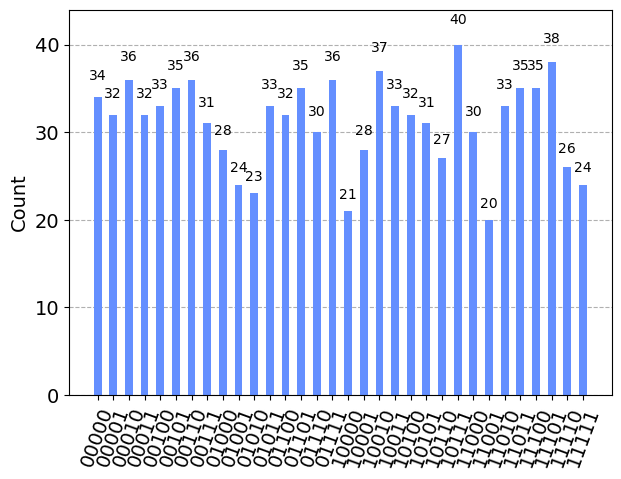

In [13]:
plot_histogram(counts)